In [115]:
from TimeTagger import FileReader
import numpy as np
import easygui
import numpy as np
import matplotlib.pyplot as plt

We know that H and V got swapped in BOB so I must correct for it in code. 

In [116]:
#GLOBAL DEFINITIONS
H = 1
V = 2
A = 3
D = 4


In [1]:
#folder = r'C:\Data\\'
folder = "/media/tanvir/QubeSat1_64/23_10_2020"
#file = '2.97mW_1.1.ttbin'
file = "onlyB.1.ttbin"
filepath = folder + '/' + file

#filepath = easygui.fileopenbox(default = folder)






In [2]:
def loadSwabianTimeStamps(fileIn, t = np.inf):
    
        file_reader = FileReader(fileIn)
        stamps = []
        channel = []
        
        
        while file_reader.hasData():
            n_events = 100000; # Number of events to read at once
            #n_events = 200000; # Number of events to read at once
            
            # Read at most n_events.
            data = file_reader.getData(n_events);  # data is an instance of TimeTagStreamBuffer

            channelTmp = data.getChannels()
            stampsTmp = data.getTimestamps()
          #  overflow_types = data.getEventTypes()   # TimeTag = 0, Error = 1, OverflowBegin = 2, OverflowEnd = 3, MissedEvents = 4
          #  missed_events = data.getMissedEvents()
            
            for i in range(len(channelTmp)):
                channel.append(channelTmp[i])
                stamps.append(stampsTmp[i])
            break
            if stamps[-1] - stamps[0] > t:
                break
        return stamps, channel


NameError: name 'np' is not defined

In [119]:
stamps, channel = loadSwabianTimeStamps(filepath)

In [120]:
channel[:20]

[2, 1, 3, 6, 1, 2, 6, 4, 2, 3, 1, 7, 8, 8, 3, 6, 8, 7, 2, 6]

In [121]:
#seperate out alice's and bob's events
astamps = []
achannel = []
bstamps = []
bchannel = []
for (s,c) in zip(stamps, channel):
    if (c <=4):
        astamps.append(s)
        achannel.append(c)
    else:
        bstamps.append(s)
        nc = c-4
        
        #23 Oct Data
        if (nc == H):
            nc = A
        elif (nc == V):
            nc = D
        elif (nc == A):
            nc = H
        elif (nc == D):
            nc = V
        else :
            print ("Error! unknown channel")
            break

        '''    
        #1st Oct data
        
        if (nc == H):
            nc = D
        elif (nc == V):
            nc = A
        elif (nc == A):
            nc = H
        elif (nc == D):
            nc = V
        else :
            print ("Error! unknown channel")
            break
        
        '''
        '''if (nc == V):
            nc = D
        elif (nc == D):
            nc = V
        
        if (nc == A):
            nc = H
        elif (nc == H):
            nc = A
            
        if (nc == A):
            nc = D
        elif (nc ==D):
            nc = A
        '''
        '''if (nc == A):
            nc = H
        elif (nc == H):
            nc = A
        elif (nc == V):
            nc = D
        elif (nc == D):
            nc = V
        '''
        
        '''#24 Aug Data
        if ( nc == H ):
            nc = A
        elif ( nc == V):
            nc = D
        elif ( nc == A):
            nc = V
        elif (nc == D):
            nc = H
        else :
            print ("Error! unknown channel")
            break
        '''    
        '''if ( nc == H):
            nc = D
        elif (nc==D):
            nc = H
        
        if ( nc == A):
            nc = V
        elif (nc ==V):
            nc = A
        
        if ( nc == A):
            nc = D
        elif ( nc == D):
            nc = A'''
        
        '''#28th and 29th July data
        if (nc == D):
            nc = H
        elif (nc == H):
            nc = A
        elif (nc == A):
            nc = V
        elif (nc== V):
            nc = D'''
        
        '''
        # 14 july data
        if (nc==3):
            nc = 4
        elif (nc == 4):
            nc = 3
            
        '''        
        bchannel.append(nc)

In [122]:
len(astamps)

47002

In [123]:
len(bstamps)

52998

In [124]:
577447917

577447917

In [125]:
len(bstamps)+len(astamps)

100000

In [126]:
#convert the resolution to 1/8 of a nanosecond
#saverawevents

In [127]:
100*(astamps[-1] - astamps[0])/10**12

2.089109531

In [128]:
achannel[-1]

2

In [129]:
astamps[:10]

[1235534489257,
 1235534516022,
 1235534804337,
 1235534844696,
 1235535183062,
 1235535455496,
 1235535706266,
 1235535750548,
 1235535934006,
 1235536494566]

In [130]:
achannel[:10]

[2, 1, 3, 1, 2, 4, 2, 3, 1, 3]

In [131]:
len(astamps)

47002

In [132]:
2197945792/64

34342903.0

In [133]:
def coincount(at,ad,bt,bd,amd=H,bmd=H,cwindow=1000,shift=0 ):
    #print("coincount: ",amd,bmd,cwindow,shift)
    ia = 0
    ib = 0
    coin_count = 0
    while (ia<len(at) and ib <len(bt)):
        #ignore beacon events
        if (ad[ia]!=amd):
            ia+=1
            continue
        if (bd[ib]!=bmd):
            ib+=1
            continue
            
        diff = bt[ib]- at[ia] + shift

        if (abs(diff)<=cwindow):
            coin_count +=1
            
            ia+=1
            ib+=1
            #continue
        elif (diff>cwindow):
            ia+=1
            #continue
        elif( diff <-cwindow):
            ib+=1
            #continue
        else:
            print ("ERROR! I should not be here")
            break
    return coin_count


In [134]:
#x = coincount(astamps, achannel,bstamps, bchannel, H, H,cwindow=1000,shift=0)
#x

In [135]:
def g2_heisto(at,ad,bt,bd,amd=H,bmd=H,cwindow=1000,search_steps=10, step_size_ps = 500,search_direction=1):
    heisto = []
    i = 0
    count = 0
    while(i<search_steps):
        shift = i*step_size_ps*search_direction
        count = coincount(at, ad,bt, bd, amd,bmd,cwindow=cwindow,shift=shift)
        #print (count)
        heisto.append(count)
        i += 1
    return heisto 

In [136]:
len(astamps)

47002

In [137]:
astamps[0]

1235534489257

In [138]:
'''h = g2_heisto(astamps, achannel,bstamps, bchannel, amd=A ,bmd=V,cwindow=500,search_steps=20,search_direction=-1)
print (h)
print(h.index(max(h)))
plt.title('HA cross correlation')
plt.xlabel("shift (500ps)")
plt.ylabel("counts")
plt.plot(h,'-bo')'''

'h = g2_heisto(astamps, achannel,bstamps, bchannel, amd=A ,bmd=V,cwindow=500,search_steps=20,search_direction=-1)\nprint (h)\nprint(h.index(max(h)))\nplt.title(\'HA cross correlation\')\nplt.xlabel("shift (500ps)")\nplt.ylabel("counts")\nplt.plot(h,\'-bo\')'

In [139]:
detectors = ["_","H","V","A","D"]

detectors H H 	shiftsteps 30 	coincount 1762
detectors H V 	shiftsteps 29 	coincount 26
detectors H A 	shiftsteps 29 	coincount 854


KeyboardInterrupt: 

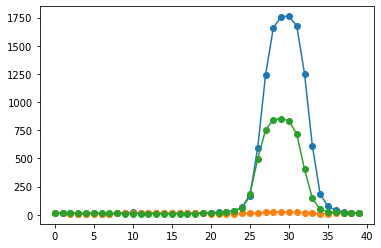

In [141]:
for i in range (1,5):
    for j in range (1,5):
        if(True):
            h = g2_heisto(astamps, achannel,bstamps, bchannel, amd=i, bmd=j,cwindow=750,search_steps=40,step_size_ps=250,search_direction=-1)
            print ("detectors", detectors[i],detectors[j],"\tshiftsteps",h.index(max(h)),"\tcoincount",max(h))
            #if (i==j) 
            plt.plot(h, marker='o', label=detectors[i]+detectors[j])

plt.title("Matching")
plt.xlabel("Shift (250ps)")
plt.ylabel("count")
#plt.legend()
plt.savefig("./plots/Matching.jpg")
plt.show()

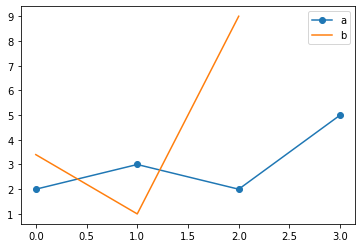

In [142]:
a = [2,3,2,5]
b = [3.4,1,9]

plt.plot(a,marker='o',label="a")
plt.plot(b,label='b')
plt.legend()
plt.show()

In [143]:
def correct_timestamp(stamps,detectors,step_size_ps=250,sH=0,sV=0,sA=0,sD=0):
    cstamp=[]
    ts = 0
    for (s,d) in zip (stamps,detectors):
        ts = s
        if(d==H): 
            ts+=sH*step_size_ps
        elif(d==V):
            ts+=sV*step_size_ps
        elif(d==A):
            ts+=sA*step_size_ps
        elif(d==D):
            ts+=sD*step_size_ps      
        cstamp.append(ts)
        
    print (step_size_ps*sH,step_size_ps*sV,step_size_ps*sA,step_size_ps*sD)
    
    return cstamp

In [177]:
#correct alice HV delay missmatch add 500ps to alice's V 
#astamps_corrected = correct_timestamp(astamps,achannel,sH=0,sV=-1*500,sA=0,sD=-2*500) #28 july data
#astamps_corrected = correct_timestamp(astamps,achannel,sH=0,sV=-2*500,sA=0,sD=-2*500) # 24 Aug data
#astamps_corrected = correct_timestamp(astamps,achannel,sH=0,sV=-2*500,sA=-3*500,sD=-1*500) # 23rd Oct data
astamps_corrected = correct_timestamp(astamps,achannel,step_size_ps=250,sH=0,sV=-3,sA=-5,sD=-1) # 26rd Oct data


0 -750 -1250 -250


In [178]:
## h = g2_heisto(astamps_corrected, achannel,bstamps, bchannel, amd=H, bmd=H,cwindow=500,search_steps=30,search_direction=-1)
#print (h)
#h.index(max(h))

In [179]:
### correct Bob
# add 7 To Bob's A basis
#bstamps_corrected = correct_timestamp(bstamps,bchannel,sH=0,sV=1*500,sA=-5*500,sD=1*500) # 28 july data
#bstamps_corrected = correct_timestamp(bstamps,bchannel,sH=0,sV=1*500,sA=1*500,sD=1*500) # 24 Aug data
#bstamps_corrected = correct_timestamp(bstamps,bchannel,sH=0,sV=-1*500,sA=0,sD=0) # 23rd Oct data
bstamps_corrected = correct_timestamp(bstamps,bchannel,step_size_ps = 250, sH=0,sV=0,sA=1,sD=1) # 26rd Oct data


0 0 250 250


[1, 3, 5, 6, 7, 7, 8, 8, 7, 7, 5, 7, 10, 10, 12, 11, 12, 13, 10, 12, 11, 18, 19, 23, 45, 124, 337, 682, 956, 1051, 1056, 984, 775, 427, 155, 54, 27, 20, 18, 15]
shift = 30


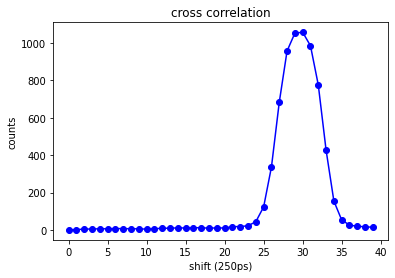

In [180]:
# HH H(D) (D)D D(V) (V)V H(A) (A)A 
h = g2_heisto(astamps_corrected, achannel,bstamps_corrected, bchannel, amd=A, bmd=A,cwindow=750,search_steps=40,step_size_ps = 250,search_direction=-1)
print (h)
print("shift =",h.index(max(h)))
plt.title('cross correlation')
plt.xlabel("shift (250ps)")
plt.ylabel("counts")
plt.plot(h,'-bo')


In [181]:
hh = {}

In [182]:
for i in range (1,5):
    for j in range (1,5):
        
        h = g2_heisto(astamps_corrected, achannel,bstamps_corrected, bchannel, amd=i, bmd=j,cwindow=750,search_steps=40,step_size_ps = 250,search_direction=-1)
        hh[str(i)+str(j)] = h
        
        print ("detectors", detectors[i],detectors[j],"\tshiftsteps",h.index(max(h)),"\tcoincount",max(h))

detectors H H 	shiftsteps 30 	coincount 1762
detectors H V 	shiftsteps 29 	coincount 26
detectors H A 	shiftsteps 30 	coincount 854
detectors H D 	shiftsteps 30 	coincount 893
detectors V H 	shiftsteps 33 	coincount 21
detectors V V 	shiftsteps 30 	coincount 1963
detectors V A 	shiftsteps 30 	coincount 929
detectors V D 	shiftsteps 30 	coincount 1008
detectors A H 	shiftsteps 29 	coincount 628
detectors A V 	shiftsteps 29 	coincount 550
detectors A A 	shiftsteps 30 	coincount 1056
detectors A D 	shiftsteps 31 	coincount 28
detectors D H 	shiftsteps 30 	coincount 654
detectors D V 	shiftsteps 30 	coincount 537
detectors D A 	shiftsteps 29 	coincount 27
detectors D D 	shiftsteps 30 	coincount 1075


detectors H H
detectors H V
detectors H A
detectors H D
detectors V H
detectors V V
detectors V A
detectors V D
detectors A H
detectors A V
detectors A A
detectors A D
detectors D H
detectors D V
detectors D A
detectors D D


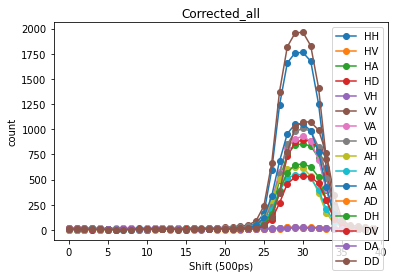

In [183]:
for i in range (1,5):
    for j in range (1,5):
        if(True):
            #h = g2_heisto(astamps, achannel,bstamps, bchannel, amd=i, bmd=j,cwindow=500,search_steps=20,search_direction=-1)
            print ("detectors", detectors[i],detectors[j])
            #if (i==j) 
            plt.plot(hh[str(i)+str(j)], marker='o', label=detectors[i]+detectors[j])

plt.title("Corrected_all")
plt.xlabel("Shift (500ps)")
plt.ylabel("count")
plt.legend()
plt.savefig("./plots/Corrected_all.jpg")
plt.show()

In [46]:
h = g2_heisto(astamps_corrected, achannel,bstamps_corrected, bchannel, amd=D, bmd=D,cwindow=500,search_steps=20,search_direction=-1)
print (h)
h.index(max(h))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 8, 77, 711, 892, 270, 25, 9, 1, 0]


14

In [47]:
print (hh[str(4)+str(4)])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 8, 77, 711, 892, 270, 25, 9, 1, 0]


In [48]:
def match_coincidence(at,ad,bt,bd,cwindow,shift):
    ia = 0
    ib = 0
    acoin_indexes = []
    bcoin_indexes = []
    while (ia<len(at) and ib <len(bt)):
        
        diff = bt[ib]- at[ia] + shift

        if (abs(diff)<=cwindow):
            #coin_count +=1
            acoin_indexes.append(ia)
            bcoin_indexes.append(ib)
            ia+=1
            ib+=1
            #continue
        elif (diff>cwindow):
            ia+=1
            #continue
        elif( diff <-cwindow):
            ib+=1
            #continue
        else:
            print ("ERROR! I should not be here")
            break
    return acoin_indexes,bcoin_indexes
    

In [49]:
ac_indexes,bc_indexes = match_coincidence(astamps_corrected,achannel,bstamps_corrected,bchannel,1500,-15*500)

In [50]:
i = 1
j = 0
print(astamps_corrected[i], bstamps_corrected[j])
print("diff",bstamps_corrected[j]-astamps_corrected[i]-13*500 )

1263979050517 1264019817441
diff 40760424


In [51]:
len(ac_indexes)

10605

In [52]:
bc_indexes[0]


0

In [53]:
bstamps_corrected[1]- astamps_corrected[1] - 6500

51378408

In [54]:
print(astamps_corrected[51],bstamps_corrected[76], bstamps_corrected[76] - astamps_corrected[51]-9*500)

1265447201009 1266169828092 722622583


In [55]:
basis_count = 0
error_count = 0
for (a,b) in zip(ac_indexes,bc_indexes):
    da = achannel[a]
    db = bchannel[b]
    if (da >= 3 and db >= 3):
        #basis HV
        #print(da,db)
        basis_count+=1
        if (da!=db):
            error_count+=1
    if( da<3 and db <3):
        #print (da,db)
        if(da!=db):
            error_count+=1
        basis_count+=1

In [56]:
basis_count

5374

In [57]:
error_count

49

In [58]:
QBER = error_count / basis_count
QBER*100

0.9117975437290659

In [59]:
astamps_corrected[0:10]

[1263972397614,
 1263979050517,
 1263987431844,
 1264019809746,
 1264026384193,
 1264031378440,
 1264056533771,
 1264122975950,
 1264127141577,
 1264133086104]

In [60]:
bstamps_corrected[0:10]

[1264019817441,
 1264030435425,
 1264034455317,
 1264048218621,
 1264050708676,
 1264098924973,
 1264111028484,
 1264113619520,
 1264150780634,
 1264179099105]

In [61]:
len (ac_indexes) / len(astamps_corrected)

0.21634026927784578

In [62]:
duration = astamps[-1]-astamps[0]
duration / (10**12)

1.378373810489

In [63]:
len(astamps)/10

4902.0

Singles rate 3.4 Million/s
coincidence rate 333 K/s 
QBER = 3.7 %
coincidence window 500 ps

for coincidence window of 1 ns QBER is around 4.2 %
